<a href="https://colab.research.google.com/github/JJJJeon/ESAA/blob/main/%EB%B0%A9%ED%95%99_%EC%8A%A4%ED%84%B0%EB%94%941_%EC%9E%90%EC%A0%84%EA%B1%B0_%EB%8C%80%EC%97%AC_%EC%88%98%EC%9A%94%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 자전거 대여 수요 예측 경진대회
* 날짜, 계절, 근무일 여부, 날씨, 온도, 체감 온도, 풍속 데이터를 활용하여 자전거 대여 수량 예측
* 유형: 회귀
* 평가지표: RMSLE
* 학습 목표: 머신러닝 모델링 프로세스와 기본적인 회귀 모델 학습
* 피처: 대여 날짜, 시간, 요일, 계절, 날씨, 온도 / 타깃값: 대여 수량

> 피처 의미
 + datetime: 기록 일시(한시간 간격)
 + season: 계절(1: 봄, 2: 여름, 3: 가을, 4: 겨울)
 + holiday: 공휴일 여부(0: 공휴일 아님, 1: 공휴일)
 + workingday: 근무일 여부(0: 근무일 아님(주말, 공휴일), 1: 근무일)
 + weather: 날씨(1: 맑음, 2: 옅은 안개, 약간 흐림, 3: 약간의 눈, 약간의 비와 천둥 번개, 흐림, 4: 폭우와 천둥 번개, 눈과 짙은 안개)
 + temp: 실제 온도
 + atemp: 체감 온도
 + humidity: 상대 습도
 + windspeed: 풍속
 + casual: 등록되지 않은 사용자(비회원) 수
 + registered: 등록된 사용자(회원) 수
 + count: 자전거 대여 수량

### 1. 데이터 둘러보기

In [125]:
import numpy as np
import pandas as pd   # 판다스 임포트

train=pd.read_csv('/content/drive/MyDrive/readcsv/bikesharing/train.csv') # 훈련 데이터
test=pd.read_csv('/content/drive/MyDrive/readcsv/bikesharing/test.csv') # 테스트 데이터
submission=pd.read_csv('/content/drive/MyDrive/readcsv/bikesharing/sampleSubmission.csv') # 제출 샘플 데이터

In [126]:
train.shape, test.shape # 피처 개수가 서로 다름

((10886, 12), (6493, 9))

In [127]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [128]:
test.head() # casual, registered 빠짐 -> train에서 casual, registered 피처 제거

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [129]:
submission.head() # datetime: 데이터 구분하는 역할 -> datetime 피처 제거

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [130]:
train.info() # 결측값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [131]:
test.info() # 결측값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


### 2. 피처 엔지니어링
datetime 피처가 시각화하기에 적합하지 않은 형태
-> 연도, 월, 일, 시간, 분, 초 피처 추가

In [132]:
print(train['datetime'][100]) # datetime 100번째 요소
print(train['datetime'][100].split()) # 공백 기준으로 문자열 나누기
print(train['datetime'][100].split()[0]) # 날짜
print(train['datetime'][100].split()[1]) # 시간

2011-01-05 09:00:00
['2011-01-05', '09:00:00']
2011-01-05
09:00:00


In [133]:
# 날짜 문자열
print(train['datetime'][100].split()[0]) # 날짜
print(train['datetime'][100].split()[0].split('-')) # "_" 기준으로 문자열 나누기
print(train['datetime'][100].split()[0].split('-')[0]) # 연도
print(train['datetime'][100].split()[0].split('-')[1]) # 월
print(train['datetime'][100].split()[0].split('-')[2]) # 일

2011-01-05
['2011', '01', '05']
2011
01
05


In [134]:
# 시간 문자열
print(train['datetime'][100].split()[1]) # 시간
print(train['datetime'][100].split()[1].split(':')) # ":" 기준으로 문자열 나누기
print(train['datetime'][100].split()[1].split(':')[0]) # 시간
print(train['datetime'][100].split()[1].split(':')[1]) # 분
print(train['datetime'][100].split()[1].split(':')[2]) # 초

09:00:00
['09', '00', '00']
09
00
00


In [135]:
train['date'] = train['datetime'].apply(lambda x: x.split()[0]) # 날짜 피처 생성

# 연도, 월, 일, 시, 분, 초 피처를 차례로 생성
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0]) 
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2]) 
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

요일 피처 생성

In [136]:
from datetime import datetime # datatime 라이브러리 임포트
import calendar

print(train['date'][100]) # 날짜
print(datetime.strptime(train['date'][100], '%Y-%m-%d')) # datetime 타입으로 변경
print(datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()) # 정수로 요일 반환
print(calendar.day_name[datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()]) # 문자열로 요일 반환

2011-01-05
2011-01-05 00:00:00
2
Wednesday


In [137]:
train['weekday'] = train['date'].apply(
    lambda dateString: 
    calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])

season, weather 피처 문자열로 변환 

In [138]:
train['season'] = train['season'].map({1: 'Spring', 
                                       2: 'Summer', 
                                       3: 'Fall', 
                                       4: 'Winter' })
train['weather'] = train['weather'].map({1: 'Clear', 
                                         2: 'Mist, Few clouds', 
                                         3: 'Light Snow, Rain, Thunder', 
                                         4: 'Heavy Snow, Rain, Thunder'})

In [139]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


date 피처 - year, month, day 피처 정보 중복 -> date 피처 제거

세분화된 month 피처 세 달씩 묶으면 season 피처와 의미 중복 -> month 피처 제거(더 큰 분류로 묶으면 성능 좋아지는 경우 있음)

### 3. 데이터 시각화

In [140]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#### 3-1. count

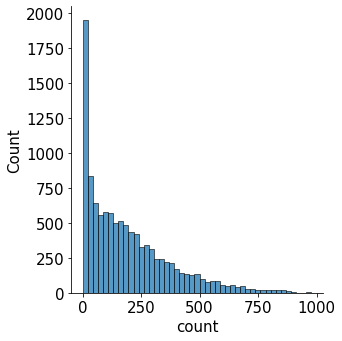

In [141]:
mpl.rc('font', size=15)      # 폰트 크기를 15로 설정 
sns.displot(train['count']); # 분포도 출력

회귀 모델이 좋은 성능을 내려면 데이터가 정규분포를 따라야 함

데이터가 왼쪽으로 편향되어 있을 때 -> 로그변환 -> 마지막에 지수변환 하여 타깃값 복원

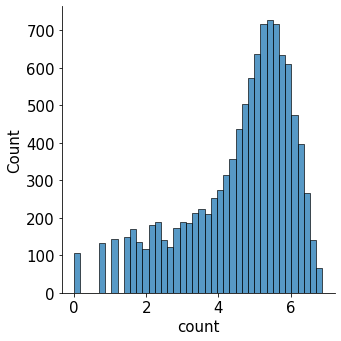

In [142]:
sns.displot(np.log(train['count']));

#### 3-2. 범주형: year, month, day, hour, minute, second

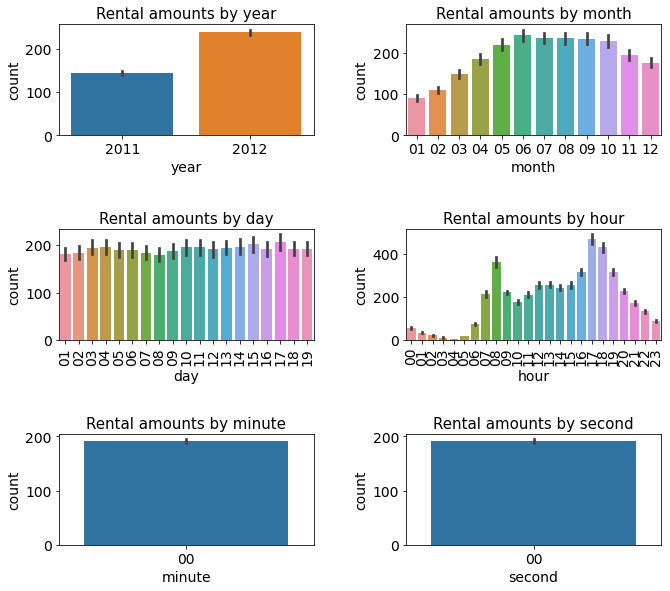

In [143]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=14)       # 폰트 크기 설정
mpl.rc('axes', titlesize=15)  # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=3, ncols=2) # 3행 2열 Figure 생성 
plt.tight_layout()            # 그래프 사이에 여백 확보 
figure.set_size_inches(10, 9) # 전체 Figure 크기를 10x9인치로 설정 

# 스텝 2 : 각 축에 서브플롯 할당
# 각 축에 연도, 월, 일, 시간, 분, 초별 평균 대여 수량 막대 그래프 할당
sns.barplot(x='year', y='count', data=train, ax=axes[0, 0])
sns.barplot(x='month', y='count', data=train, ax=axes[0, 1])
sns.barplot(x='day', y='count', data=train, ax=axes[1, 0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1, 1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2, 0])
sns.barplot(x='second', y='count', data=train, ax=axes[2, 1])

# 스텝 3 : 세부 설정
# 3-1 : 서브플롯에 제목 달기
axes[0, 0].set(title='Rental amounts by year')
axes[0, 1].set(title='Rental amounts by month')
axes[1, 0].set(title='Rental amounts by day')
axes[1, 1].set(title='Rental amounts by hour')
axes[2, 0].set(title='Rental amounts by minute')
axes[2, 1].set(title='Rental amounts by second')

# 3-2 : 1행에 위치한 서브플롯들의 x축 라벨 90도 회전
axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

* year: 2012년에 대여가 많았다
* month: 날씨가 따뜻할수록 대여 수량이 많다고 짐작
* day: 1-19일 데이터만 있음(20~는 테스트 데이터) -> day 피처 제거
* hour: 쌍봉형 그래프 모양. 등하교 혹은 출퇴근 길에 자전거 많이 이용한다고 짐작
* minute, second: 모두 0으로 기록되어 있어 아무 정보가 없음 -> minute, second 피처 제거

#### 3-3. 계절, 날씨, 공휴일, 근무일 별 대여수량

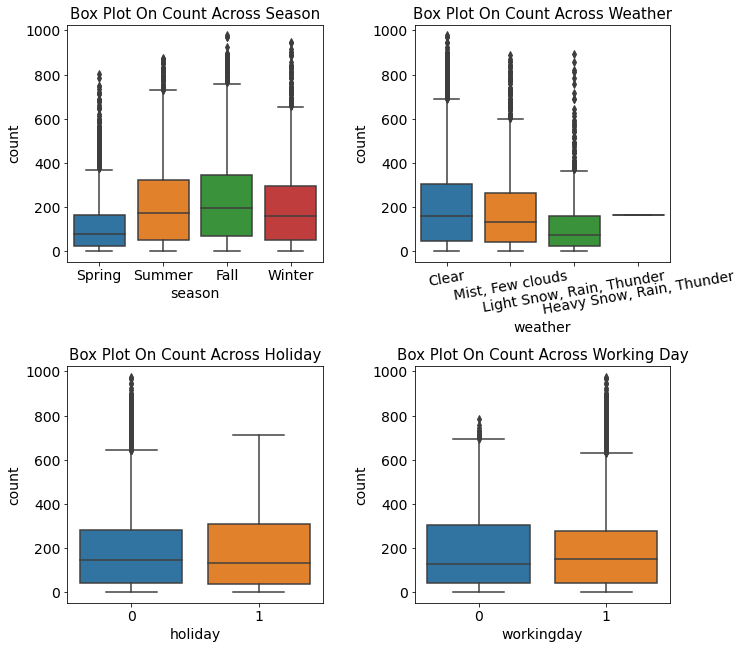

In [144]:
# 스텝 1 : m행 n열 Figure 준비
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(10, 10)

# 스텝 2 : 서브플롯 할당
# 계절, 날씨, 공휴일, 근무일별 대여 수량 박스플롯
sns.boxplot(x='season', y='count', data=train, ax=axes[0, 0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0, 1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1, 0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1, 1])

# 스텝 3 : 세부 설정
# 3-1 : 서브플롯에 제목 달기
axes[0, 0].set(title='Box Plot On Count Across Season')
axes[0, 1].set(title='Box Plot On Count Across Weather')
axes[1, 0].set(title='Box Plot On Count Across Holiday')
axes[1, 1].set(title='Box Plot On Count Across Working Day')

# 3-2 : x축 라벨 겹침 해결
axes[0, 1].tick_params('x', labelrotation=10) # 10도 회전

* season: 봄에 가장 적고 가을에 가장 많음
* weather: 날씨 좋을 때 대여 수량 가장 많고, 안 좋을수록 수량 적음
* holiday: 중앙값 비슷하지만 공휴일 아닐 때 이상치 많음
* workingday: 근무일일 때 이상치 많음

#### 3-4. 근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여 수량

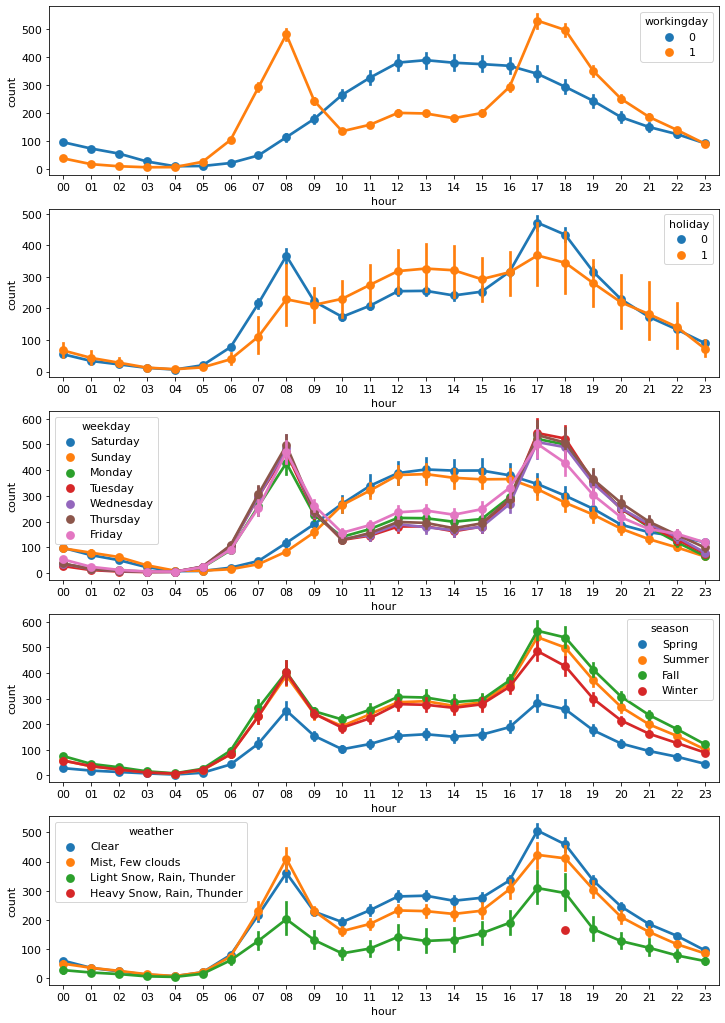

In [145]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=5) # 5행 1열
figure.set_size_inches(12, 18)

# 스텝 2 : 서브플롯 할당
# 근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여 수량 포인트플롯
sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[4]);

* 근무일: 출퇴근 시간에 대여 수량 많음, 쉬는날: 오후 12-2시에 가장 많음. 공휴일 여부, 요일에 따른 그래프도 비슷한 양상
* 계절: 가을에 가장 많고 봄에 가장 적음
* 날씨: 폭우, 폭설일 때 대여 건수는 이상치 -> 제거하는 것이 성능이 더 좋음. weather==4인 데이터 제거

#### 3-5. 수치형: 온도, 체감 온도, 풍속, 습도별 대여 수량

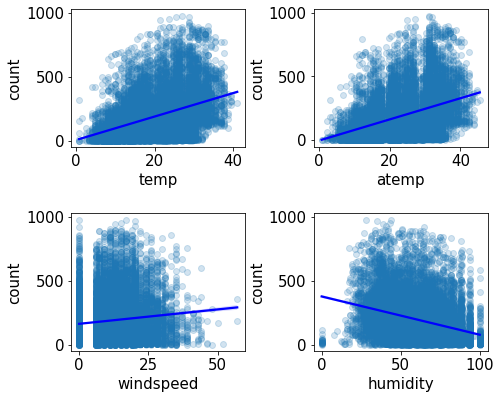

In [146]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=15)
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(7, 6)

# 스텝 2 : 서브플롯 할당
# 온도, 체감 온도, 풍속, 습도 별 대여 수량 산점도 그래프
sns.regplot(x='temp', y='count', data=train, ax=axes[0, 0], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='atemp', y='count', data=train, ax=axes[0, 1], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='windspeed', y='count', data=train, ax=axes[1, 0], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='humidity', y='count', data=train, ax=axes[1, 1], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'});

* 온도, 체감온도: 높을수록 대여 수량 높음
* 습도: 낮을수록 대여 수량 높음
* 풍속: 0으로 기록된 결측값 많음. 상관관계 파악 힘듦 -> windspeed 피처 제거

#### 3-6. 히트맵: temp, atempt, humidity, windspeed, count

In [147]:
train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr() # 상관관계 매트릭스: 어느 피처들의 관계가 깊은지 한눈에 들어오지 않음

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


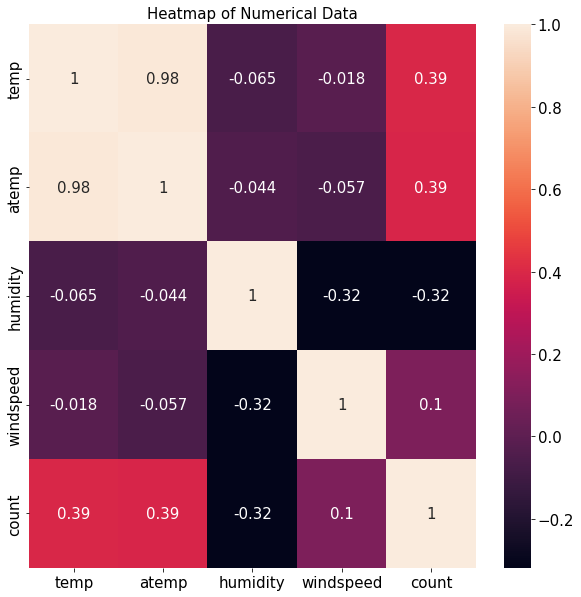

In [148]:
# 피처 간 상관관계 매트릭스
corrMat = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr() 
fig, ax= plt.subplots() 
fig.set_size_inches(10, 10)
sns.heatmap(corrMat, annot=True) # 상관관계 히트맵 그리기
ax.set(title='Heatmap of Numerical Data');

* 온도-대여 수량: 양의 상관관계
* 습도-대여 수량: 음의 상관관계
* 풍속-대여 수량: 상관관계 매우 약함 -> windspeed 피처 제거

### 4. 베이스라인 모델
베이스라인 모델: 뼈대가 되는 가장 기본적인 모델

In [149]:
import pandas as pd   

train=pd.read_csv('/content/drive/MyDrive/readcsv/bikesharing/train.csv')
test=pd.read_csv('/content/drive/MyDrive/readcsv/bikesharing/test.csv')
submission=pd.read_csv('/content/drive/MyDrive/readcsv/bikesharing/sampleSubmission.csv') 

In [150]:
# 이상치 제거: 훈련 데이터에서 weather가 4가 아닌 데이터만 추출
train = train[train['weather'] != 4]

#### 4-1. train, test 데이터 합치기

In [151]:
all_data_temp = pd.concat([train, test])
all_data_temp

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [152]:
all_data = pd.concat([train, test], ignore_index=True) # 원래 데이터 인덱스 무시하고 이어붙이기
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


#### 4-2. 파생 피처(변수) 추가

In [153]:
from datetime import datetime

# 날짜 피처 생성
all_data['date'] = all_data['datetime'].apply(lambda x: x.split()[0])
# 연도 피처 생성
all_data['year'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[0])
# 월 피처 생성
all_data['month'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[1])
# 시 피처 생성
all_data['hour'] = all_data['datetime'].apply(lambda x: x.split()[1].split(':')[0])
# 요일 피처 생성
all_data["weekday"] = all_data['date'].apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())

# day, minute, second 생성하지 않음

#### 4-3. 피처 선택-필요 없는 피처 제거

In [154]:
drop_features = ['casual', 'registered', 'datetime', 'date', 'month', 'windspeed']

all_data = all_data.drop(drop_features, axis=1)

#### 4-4. train, test 데이터 나누기

In [155]:
# 훈련 데이터와 테스트 데이터 나누기
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]

# 타깃값 count 제거
X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)

y = train['count'] # 타깃값

In [156]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,2011,00,5
1,1,0,0,1,9.02,13.635,80,2011,01,5
2,1,0,0,1,9.02,13.635,80,2011,02,5
3,1,0,0,1,9.84,14.395,75,2011,03,5
4,1,0,0,1,9.84,14.395,75,2011,04,5


In [157]:
from sklearn.model_selection import train_test_split
X_train, X_tr_test, y_train, y_tr_test = train_test_split(X_train, y, test_size=0.2, random_state=156)

#### 4-5. 평가지표 계산 함수 작성 : RMSLE

In [33]:
import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
    # 지수변환: 타깃값 log(count)
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
        
    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))
    
    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

In [87]:
import numpy as np

def rmsle1(y_true, y_pred, convertExp=True):
    # 지수변환: 타깃값 log(count)
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
        
    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log1p(y_true))
    log_pred = np.nan_to_num(np.log1p(y_pred))
    
    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

#### 4-6. 모델 훈련과 성능 검증: 선형 회귀 모델

In [83]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

In [123]:
log_y_tr_test = np.log(y_tr_test)
log_y_train=np.log(y_train)  # 타깃값 로그변환
linear_reg_model.fit(X_train, log_y_train) # 모델 훈련

LinearRegression()

In [86]:
preds = linear_reg_model.predict(X_tr_test)
print (f'선형회귀의 RMSLE 값 : {rmsle(log_y_tr_test, preds, True):.4f}')

선형회귀의 RMSLE 값 : 1.0020


In [88]:
print (f'선형회귀의 RMSLE 값 : {rmsle1(log_y_tr_test, preds, True):.4f}')

선형회귀의 RMSLE 값 : 1.0020


#### 4-7. 예측 및 결과 제출
* 테스트 데이터로 예측한 결과 이용
* 예측한 값에 지수변환

In [37]:
linearreg_preds = linear_reg_model.predict(X_test) # 테스트 데이터로 예측

submission['count'] = np.exp(linearreg_preds)    # 지수변환
submission.to_csv('submission.csv', index=False) # 파일로 저장

### 5. 성능 개선

#### 5-1. 릿지 회귀 모델
L2 규제를 적용한 선형 회귀 모델 (규제: 모델이 훈련 데이터에 과대적합 되지 않도록 해주는 방법)

In [38]:
## 모델 생성
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model = Ridge()

In [39]:
## 그리드서치 객체 생성
# 하이퍼 파라미터 값 목록
ridge_params = {'max_iter':[3000], 'alpha':[0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}

# 교차 검증용 평가 함수(RMSLE 점수 계산)
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
# 그리드서치(with 릿지) 객체 생성
gridsearch_ridge_model = GridSearchCV(estimator=ridge_model,   # 릿지 모델
                                      param_grid=ridge_params, # 값 목록
                                      scoring=rmsle_scorer,    # 평가지표
                                      cv=5)                    # 교차검증 분할 수

> GridSearchCV() 주요 파라미터
 + estimator: 분류 및 회귀 모델
 + param_grid: 딕셔너리 형태로 모델의 하이퍼파라미터명과 여러 하이퍼파라미터 값을 지정
 + scoring: 평가지표
 + cv: 교차 검증 분할 개수(기본값은 5)


In [89]:
## 그리드서치 수행
log_y_tr_test = np.log(y_tr_test)
log_y_train=np.log(y_train)  # 타깃값 로그변환
gridsearch_ridge_model.fit(X_train, log_y_train) # 훈련(그리드서치)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400,
                                   800, 900, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [90]:
print('최적 하이퍼파라미터 :', gridsearch_ridge_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 100, 'max_iter': 3000}


In [91]:
## 성능 검증
# 예측
preds = gridsearch_ridge_model.best_estimator_.predict(X_tr_test) 

# 평가
print(f'릿지 회귀 RMSLE 값 : {rmsle(log_y_tr_test, preds, True):.4f}') 

릿지 회귀 RMSLE 값 : 1.0022


#### 5-2. 라쏘 회귀 모델
L1 규제를 적용한 선형 회귀 모델

In [92]:
## 하이퍼파라미터 최적화
from sklearn.linear_model import Lasso

# 모델 생성
lasso_model = Lasso()
# 하이퍼파라미터 값 목록
lasso_alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params = {'max_iter':[3000], 'alpha':lasso_alpha}
# 그리드서치(with 라쏘) 객체 생성
gridsearch_lasso_model = GridSearchCV(estimator=lasso_model,
                                      param_grid=lasso_params,
                                      scoring=rmsle_scorer,
                                      cv=5)
# 그리드서치 수행
log_y_tr_test = np.log(y_tr_test)
log_y_train=np.log(y_train)  # 타깃값 로그변환
gridsearch_lasso_model.fit(X_train, log_y_train)

print('최적 하이퍼파라미터 :', gridsearch_lasso_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 0.005, 'max_iter': 3000}


In [93]:
## 성능 검증
# 예측
preds = gridsearch_lasso_model.best_estimator_.predict(X_tr_test)

# 평가
print(f'라쏘 회귀 RMSLE 값 : {rmsle(log_y_tr_test, preds, True):.4f}')

라쏘 회귀 RMSLE 값 : 1.0020


#### 5-3. 랜덤 포레스트 회귀 모델

In [94]:
# Grid x
from sklearn.ensemble import RandomForestRegressor

# 모델 생성
randomforest_model = RandomForestRegressor()
log_y_tr_test = np.log(y_tr_test)
log_y_train=np.log(y_train)
randomforest_model.fit(X_train, log_y_train)
pred1=randomforest_model.predict(X_tr_test)

In [95]:
# Grid o
## 하이퍼 파라미터 최적화
from sklearn.ensemble import RandomForestRegressor

# 모델 생성
randomforest_model = RandomForestRegressor()
# 그리드서치 객체 생성
rf_params = {'random_state':[42], 'n_estimators':[100, 120, 140]}
gridsearch_random_forest_model = GridSearchCV(estimator=randomforest_model,
                                              param_grid=rf_params,
                                              scoring=rmsle_scorer,
                                              cv=5)
# 그리드서치 수행
log_y_tr_test = np.log(y_tr_test)
log_y_train=np.log(y_train)  # 타깃값 로그변환
gridsearch_random_forest_model.fit(X_train, log_y_train)

print('최적 하이퍼파라미터 :', gridsearch_random_forest_model.best_params_)

최적 하이퍼파라미터 : {'n_estimators': 140, 'random_state': 42}


In [97]:
## 모델 성능 검증
# 예측
pred2 = gridsearch_random_forest_model.best_estimator_.predict(X_tr_test)

In [184]:
# randomsearch
from sklearn.model_selection import RandomizedSearchCV
n_iter_search=20
params={'random_state':[42], 'n_estimators':range(100,140)}
rf_rs=RandomizedSearchCV(randomforest_model, param_distributions=params, n_iter=n_iter_search, cv=1, n_jobs=-1)
rf_rs.fit(X_train, log_y_train)
print('최적 하이퍼파라미터 :',rf_rs.best_params_)

ValueError: ignored

In [185]:
# 랜덤 서치

from sklearn.model_selection import RandomizedSearchCV

rf_params = {
    'n_estimators':range(100,251, 50),
    'max_depth':range(5, 31, 5),
    'min_samples_leaf':range(3,16,3),
    'min_samples_split':range(3,16,3)
}
rf_rd = RandomizedSearchCV(randomforest_model, param_distributions=rf_params, n_iter=30, cv=5)
rf_rd.fit(X_train, log_y_train)

print(rf_rd.best_params_)

{'n_estimators': 250, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_depth': 30}


In [105]:
# 평가
print(f'랜덤 포레스트 회귀 RMSLE 값 : {rmsle(log_y_tr_test, pred1, True):.4f}')
print(f'랜덤 포레스트 회귀 RMSLE 값 : {rmsle(log_y_tr_test, pred2, True):.4f}')

랜덤 포레스트 회귀 RMSLE 값 : 0.3089
랜덤 포레스트 회귀 RMSLE 값 : 0.3074


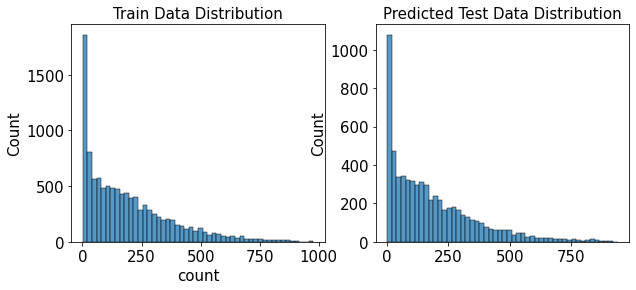

In [47]:
## 예측 및 결과 제출
import seaborn as sns
import matplotlib.pyplot as plt

randomforest_preds = gridsearch_random_forest_model.best_estimator_.predict(X_test)

figure, axes = plt.subplots(ncols=2)
figure.set_size_inches(10, 4)

sns.histplot(y, bins=50, ax=axes[0])
axes[0].set_title('Train Data Distribution')
sns.histplot(np.exp(randomforest_preds), bins=50, ax=axes[1])
axes[1].set_title('Predicted Test Data Distribution');

In [179]:
# temp 제거
X_train_temp=X_train.drop('temp',axis=1)
X_test_temp=X_test.drop('temp',axis=1)
X_tr_test_temp=X_train.drop('temp',axis=1)

from sklearn.ensemble import RandomForestRegressor
randomforest_model = RandomForestRegressor()
log_y_tr_test1 = np.log(y_tr_test)
log_y_train=np.log(y_train)
randomforest_model.fit(X_train_temp, log_y_train)
pred1=randomforest_model.predict(X_tr_test_temp)

In [180]:
# atemp 제거
X_train_atemp=X_train.drop('atemp',axis=1)
X_test_atemp=X_test.drop('atemp',axis=1)
X_tr_test_atemp=X_train.drop('atemp',axis=1)

from sklearn.ensemble import RandomForestRegressor
randomforest_model = RandomForestRegressor()
log_y_tr_test2 = np.log(y_tr_test)
log_y_train=np.log(y_train)
randomforest_model.fit(X_train_atemp, log_y_train)
pred2=randomforest_model.predict(X_tr_test_atemp)

In [181]:
# 평가
print(f'랜덤 포레스트 회귀 RMSLE 값 : {rmsle(log_y_tr_test1, pred1, True):.4f}')
print(f'랜덤 포레스트 회귀 RMSLE 값 : {rmsle(log_y_tr_test2, pred2, True):.4f}')

ValueError: ignored

#### 5-4. DecisionTreeRegressor

In [158]:
from sklearn.tree import DecisionTreeRegressor
#모델 생성 및 훈련
dt_reg=DecisionTreeRegressor(max_depth=7, random_state=156)
dt_reg.fit(X_train, log_y_train)

#예측값 구하기
pred_dt=dt_reg.predict(X_tr_test)

In [159]:
# 평가
print(f'결정트리 회귀 RMSLE 값 : {rmsle(log_y_tr_test, pred_dt, True):.4f}')

결정트리 회귀 RMSLE 값 : 0.5110


#### 5-5. XGBoost

In [165]:
X_train_xgb=X_train.drop(['hour','year'],axis=1)
X_tr_test_xgb=X_tr_test.drop(['hour','year'],axis=1)

In [167]:
from xgboost import XGBRegressor
xgb_reg=XGBRegressor(n_estimators=100, random_state=156)
xgb_reg.fit(X_train_xgb, log_y_train)

#예측값 구하기
pred_xgb=xgb_reg.predict(X_tr_test_xgb)

# 평가
print(f'XGBoost 회귀 RMSLE 값 : {rmsle(log_y_tr_test, pred_xgb, True):.4f}')

[12:53:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost 회귀 RMSLE 값 : 1.1682


In [162]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8708 entries, 5215 to 7724
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      8708 non-null   int64  
 1   holiday     8708 non-null   int64  
 2   workingday  8708 non-null   int64  
 3   weather     8708 non-null   int64  
 4   temp        8708 non-null   float64
 5   atemp       8708 non-null   float64
 6   humidity    8708 non-null   int64  
 7   year        8708 non-null   object 
 8   hour        8708 non-null   object 
 9   weekday     8708 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 748.3+ KB


#### 5-6. GBM

In [168]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=156)
gbr.fit(X_train, log_y_train)
pred_gbr = gbr.predict(X_tr_test)
print(f'GBM 회귀 RMSLE 값 : {rmsle(log_y_tr_test, pred_gbr, True):.4f}')

GBM 회귀 RMSLE 값 : 0.3860


In [176]:
gbr_params = {
    'learning_rate' : [0.15,0.1,0.05,0.01],
    'n_estimators' : [250,500,750],
    'max_depth' : [2,3,4,5]
    #'min_samples_split' : [0.3, 0.6, 0.9],
    #'min_samples_leaf' : [0.2, 0.4, 0.5]
}

gbr_grid = GridSearchCV(gbr, param_grid = gbr_params, cv=3, verbose=1)
gbr_grid.fit(X_train, log_y_train)

print('GridSearchCV 최적 estimator:', gbr_grid.best_estimator_)
print('GridSearchCV 최적 파라미터:', gbr_grid.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
GridSearchCV 최적 estimator: GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=750,
                          random_state=156)
GridSearchCV 최적 파라미터: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 750}


In [177]:
gbr_best = GradientBoostingRegressor(random_state=156, learning_rate=0.05, max_depth=5, n_estimators=750)
gbr_best.fit(X_train, log_y_train)
gbr_best_pred = gbr_best.predict(X_tr_test)

In [178]:
print(f'GBM 회귀 RMSLE 값 : {rmsle(log_y_tr_test, gbr_best_pred, True):.4f}')

GBM 회귀 RMSLE 값 : 0.2888


#### 5-7. LightGBM

In [175]:
from lightgbm import LGBMRegressor
lgbm_reg = LGBMRegressor(n_estimators=1000, random_state=156)
evals = [(X_tr_test_xgb,log_y_tr_test)]
lgbm_reg.fit(X_train_xgb, log_y_train,
                 early_stopping_rounds=30, eval_metric="logloss",
                 verbose=True,eval_set=evals,)
preds_lgbm= lgbm_reg.predict(X_tr_test_xgb)
print(f'LightGBM 회귀 RMSLE 값 : {rmsle(log_y_tr_test, preds_lgbm, True):.4f}')

[1]	valid_0's l2: 2.11252
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's l2: 2.01278
[3]	valid_0's l2: 1.92939
[4]	valid_0's l2: 1.862
[5]	valid_0's l2: 1.80591
[6]	valid_0's l2: 1.75992
[7]	valid_0's l2: 1.72243
[8]	valid_0's l2: 1.68858
[9]	valid_0's l2: 1.66152
[10]	valid_0's l2: 1.6369
[11]	valid_0's l2: 1.61589
[12]	valid_0's l2: 1.59536
[13]	valid_0's l2: 1.58072
[14]	valid_0's l2: 1.56706
[15]	valid_0's l2: 1.55625
[16]	valid_0's l2: 1.54626
[17]	valid_0's l2: 1.53906
[18]	valid_0's l2: 1.53121
[19]	valid_0's l2: 1.52578
[20]	valid_0's l2: 1.51806
[21]	valid_0's l2: 1.51414
[22]	valid_0's l2: 1.50836
[23]	valid_0's l2: 1.50691
[24]	valid_0's l2: 1.5029
[25]	valid_0's l2: 1.50098
[26]	valid_0's l2: 1.49877
[27]	valid_0's l2: 1.49628
[28]	valid_0's l2: 1.49204
[29]	valid_0's l2: 1.4893
[30]	valid_0's l2: 1.48612
[31]	valid_0's l2: 1.48276
[32]	valid_0's l2: 1.48202
[33]	valid_0's l2: 1.47965
[34]	valid_0's l2: 1.47638
[35]	valid_0's l2: 1.47539
[36]	va